In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# 1. Cargar el dataset y convertirlo a un DataFrame de pandas
cancer = load_breast_cancer()
df = pd.DataFrame(data=np.c_[cancer['data'], cancer['target']], columns=cancer['feature_names'].tolist() + ['target'])

print("--- Análisis de Información del DataFrame ---")
df.info()

--- Análisis de Información del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-n

Muestra la estructura del DataFrame: número de filas, columnas, tipo de datos y memoria utilizada. Es útil para verificar que todas las características del dataset y la variable objetivo (target) se hayan cargado correctamente. También nos permite identificar si hay valores nulos y entender la escala de los datos.

In [3]:
# 2. Estadísticas Descriptivas de las Características Numéricas
print("\n--- Estadísticas Descriptivas de las Características Numéricas ---")
print(df.describe())


--- Estadísticas Descriptivas de las Características Numéricas ---
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630

Se resumen las estadísticas básicas de cada variable numérica: media, desviación estándar, valores mínimo y máximo, y los percentiles. Nos da una visión rápida de la distribución y dispersión de las características, permitiéndonos detectar posibles outliers o rangos inusuales que podrían afectar el análisis posterior.

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0



--- Conteo de Casos por Clase (Diagnóstico) ---
target
1.0    357
0.0    212
Name: count, dtype: int64


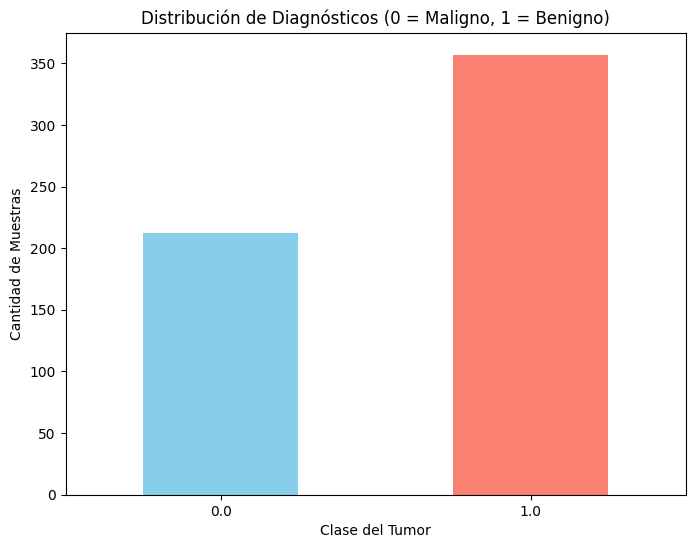

In [5]:
# 3. Análisis de la variable objetivo (target)
print("\n--- Conteo de Casos por Clase (Diagnóstico) ---")
print(df['target'].value_counts())

plt.figure(figsize=(8, 6))
df['target'].value_counts().sort_index().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Diagnósticos (0 = Maligno, 1 = Benigno)')
plt.xlabel('Clase del Tumor')
plt.ylabel('Cantidad de Muestras')
plt.xticks(rotation=0)
plt.show()

Mostramos cuántas muestras corresponden a cada clase: 0 = maligno, 1 = benigno. Esto nos ayuda a entender si el dataset está equilibrado o si existe un desbalance que podría influir en la clasificación


--- Matriz de Correlación ---


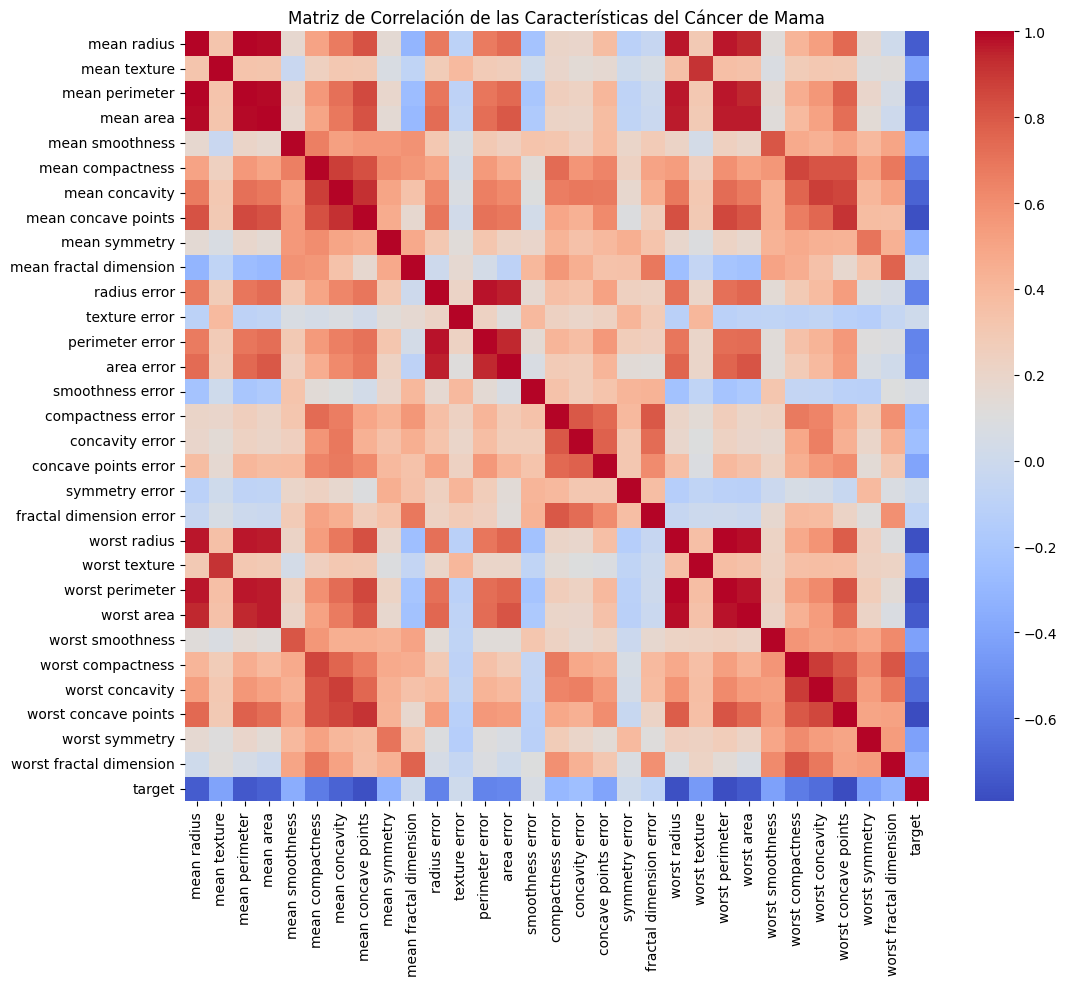

In [6]:
# 4. Matriz de correlación y visualización con Heatmap
print("\n--- Matriz de Correlación ---")
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación de las Características del Cáncer de Mama')
plt.show()

La matriz de correlación muestra cómo se relacionan las variables entre sí. Valores cercanos a 1 o -1 indican correlaciones fuertes positiva o negativa, respectivamente. Esto es importante para detectar redundancia entre variables y posibles candidatos para reducción de dimensionalidad.


--- Visualización de la Distribución de Variables Clave ---


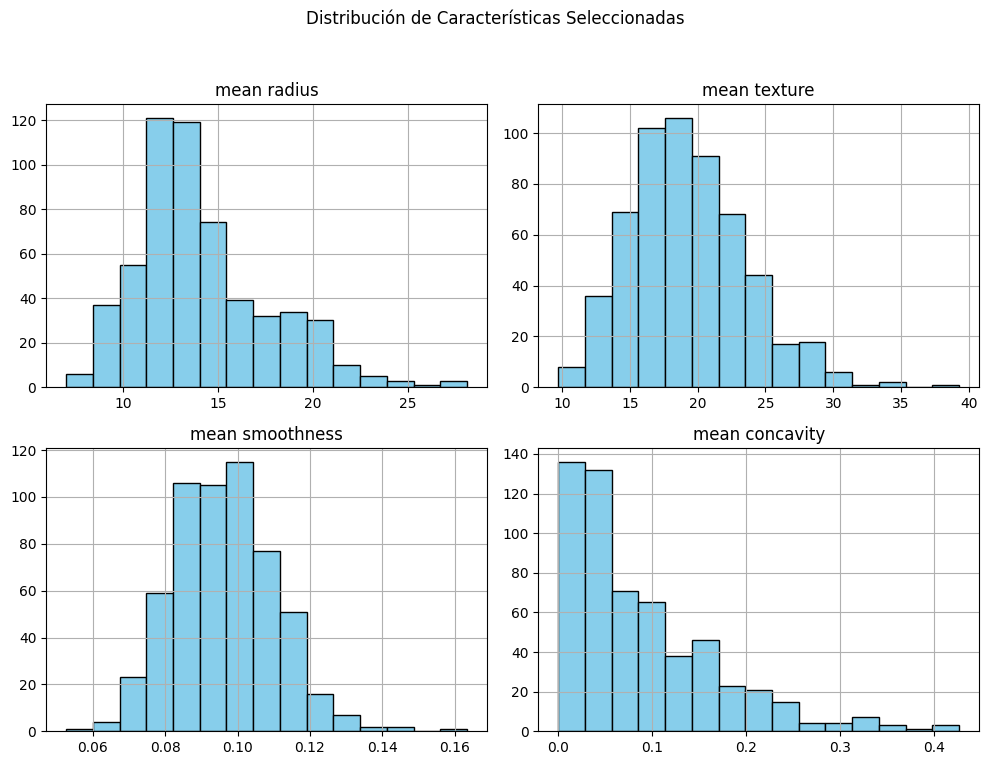

In [7]:
# 5. Histograma para visualizar la distribución de algunas características
print("\n--- Visualización de la Distribución de Variables Clave ---")
selected_features = ['mean radius', 'mean texture', 'mean smoothness', 'mean concavity']
df[selected_features].hist(figsize=(10, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Distribución de Características Seleccionadas')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Los histogramas permiten observar la distribución de los valores de las características seleccionadas. Podemos identificar sesgos, asimetrías o patrones de dispersión. Esta visualización ayuda a entender cómo se comportan los datos antes de aplicar técnicas de clustering o clasificación

/tmp/ipykernel_15208/772741580.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='mean radius', data=df, palette='Set2')


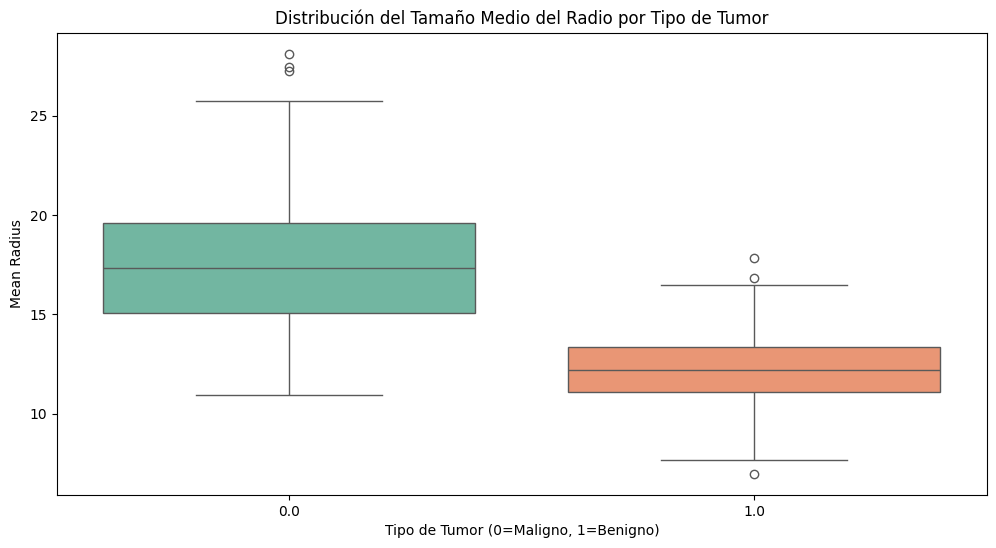

In [8]:
# 6. Boxplots para comparar distribuciones entre clases
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='mean radius', data=df, palette='Set2')
plt.title("Distribución del Tamaño Medio del Radio por Tipo de Tumor")
plt.xlabel("Tipo de Tumor (0=Maligno, 1=Benigno)")
plt.ylabel("Mean Radius")
plt.show()

El boxplot compara la distribución de mean radius entre tumores malignos y benignos. Nos permite visualizar medianas, rangos intercuartílicos y posibles valores atípicos, mostrando de forma clara si una característica puede diferenciar entre clases

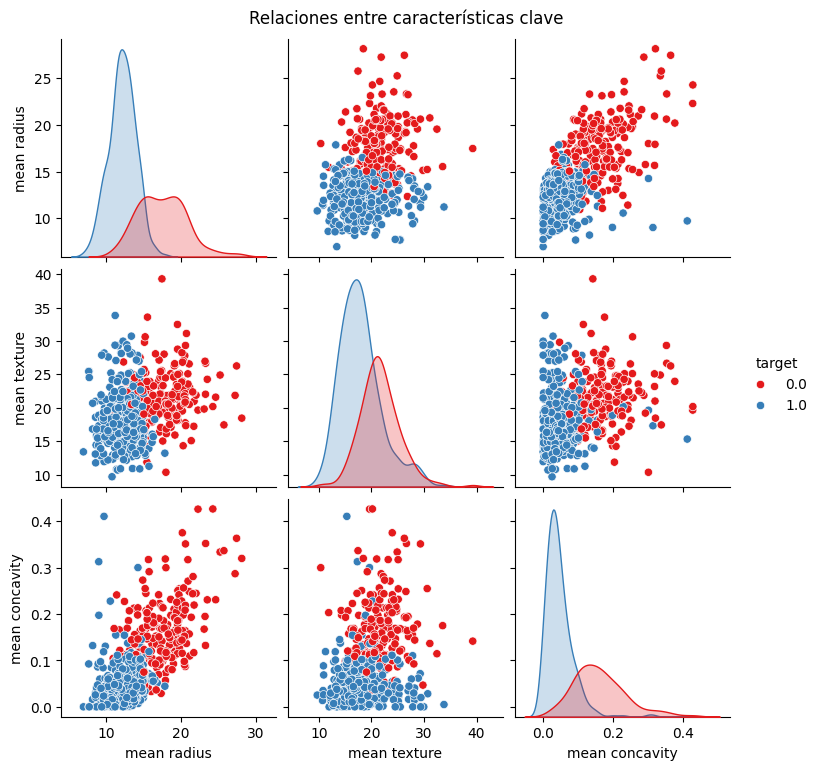

In [9]:
# 7. Pairplot (gráfico de dispersión cruzado entre variables seleccionadas)
sns.pairplot(df[['mean radius', 'mean texture', 'mean concavity', 'target']], hue="target", diag_kind="kde", palette="Set1")
plt.suptitle("Relaciones entre características clave", y=1.02)
plt.show()

Este gráfico muestra relaciones de dispersión entre pares de variables clave, separadas por clase. Las diagonales muestran la densidad de cada variable. Es útil para detectar patrones, clusters naturales y posibles combinaciones de características que distingan las clases.

In [10]:
# 8. Análisis de varianza (ANOVA simplificado: diferencias entre clases en una variable)
from scipy.stats import f_oneway
f_stat, p_val = f_oneway(
    df[df['target'] == 0]['mean radius'],
    df[df['target'] == 1]['mean radius']
)
print(f"\nANOVA en Mean Radius entre clases: F = {f_stat:.2f}, p = {p_val:.5f}")


ANOVA en Mean Radius entre clases: F = 646.98, p = 0.00000


El ANOVA nos indica si existe una diferencia significativa en la media de mean radius entre tumores malignos y benignos. Un p-valor muy bajo (< 0.05) sugiere que las medias de las clases son estadísticamente diferentes, lo que justifica que esta variable puede ser útil para clasificación.

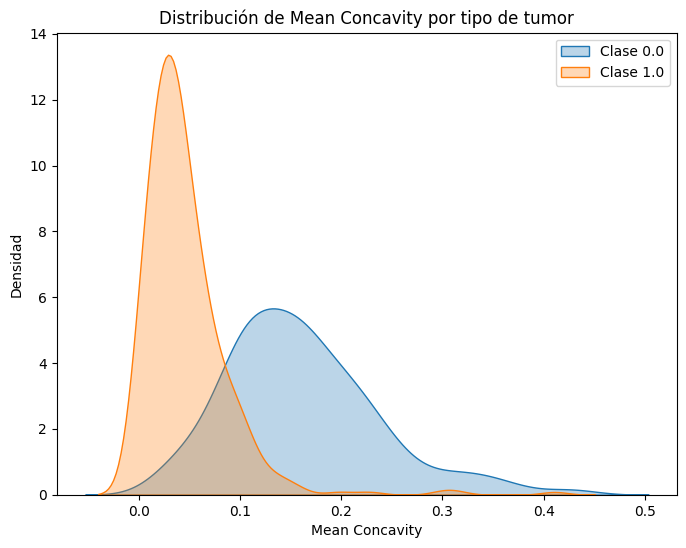

In [11]:
# 9. Visualización de densidad de una variable
plt.figure(figsize=(8,6))
for t in df['target'].unique():
    subset = df[df['target']==t]
    sns.kdeplot(subset['mean concavity'], label=f"Clase {t}", fill=True, alpha=0.3)
plt.title("Distribución de Mean Concavity por tipo de tumor")
plt.xlabel("Mean Concavity")
plt.ylabel("Densidad")
plt.legend()
plt.show()

Los gráficos de densidad muestran cómo se distribuyen los valores de mean concavity para cada clase. Permiten ver solapamientos entre clases y la separación de las distribuciones, lo que da una idea de la dificultad del clustering o clasificación

# CLASIFICACIÓN

In [12]:
# 1. Cargar el dataset real
X = cancer.data
y_true = cancer.target
feature_names = cancer.feature_names

In [13]:
# 2. Seleccionar 2 variables (mean radius y mean concavity)
X_plot = df[['mean radius', 'mean concavity']].values

In [14]:
# 3. Aplicar K-Means con 2 clusters (benigno/maligno)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_plot)
y_kmeans = kmeans.predict(X_plot)

Se aplica K-Means para agrupar las muestras en 2 clusters sin usar la información de las clases reales. Cada cluster representa un grupo de tumores con características similares. Esto nos permite evaluar si el clustering puede aproximarse a la clasificación real

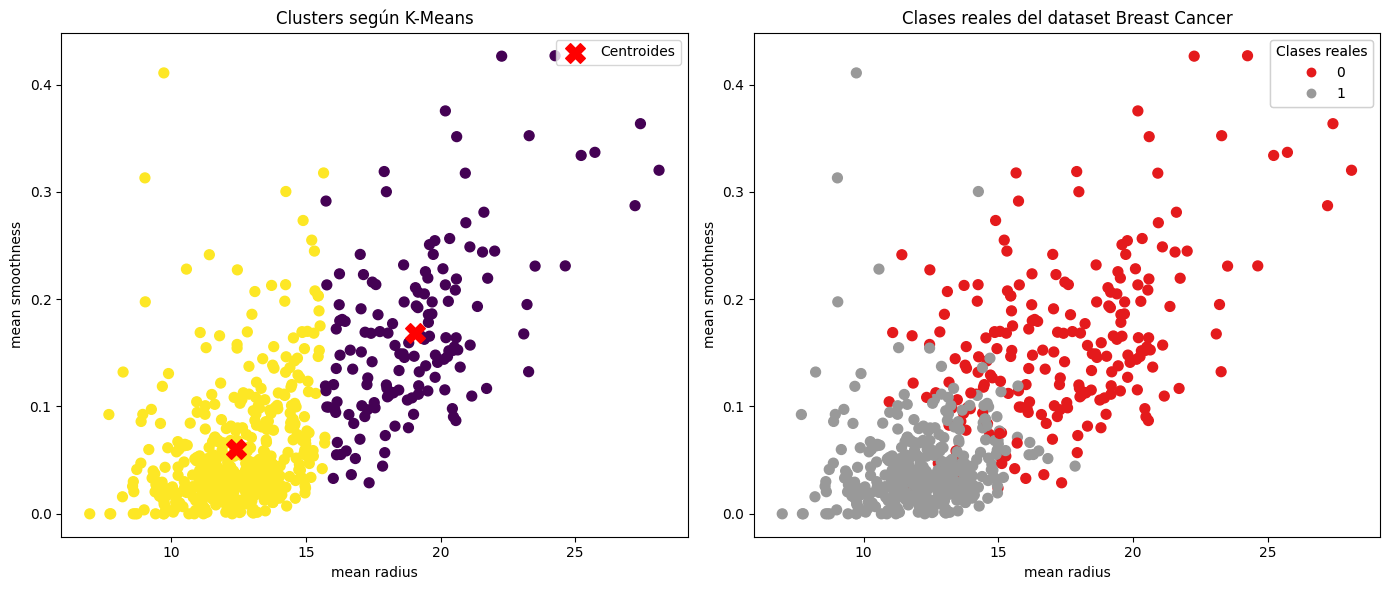

In [15]:
# 4. Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# (a) Clusters de K-Means
scatter1 = axes[0].scatter(X_plot[:, 0], X_plot[:, 1], c=y_kmeans, cmap="viridis", s=50)
centers = kmeans.cluster_centers_
axes[0].scatter(centers[:, 0], centers[:, 1], c="red", s=200, marker="X", label="Centroides")
axes[0].set_title("Clusters según K-Means")
axes[0].set_xlabel(feature_names[0])
axes[0].set_ylabel(feature_names[4])
axes[0].legend()

# (b) Clases reales (target)
scatter2 = axes[1].scatter(X_plot[:, 0], X_plot[:, 1], c=y_true, cmap="Set1", s=50)
legend2 = axes[1].legend(*scatter2.legend_elements(), title="Clases reales")
axes[1].add_artist(legend2)
axes[1].set_title("Clases reales del dataset Breast Cancer")
axes[1].set_xlabel(feature_names[0])
axes[1].set_ylabel(feature_names[4])

plt.tight_layout()
plt.show()

Se comparan los clusters detectados por K-Means con las clases reales. Podemos ver si el algoritmo logra separar bien los tumores malignos y benignos usando solo mean radius y mean concavity. Los centroides rojos indican el “centro” de cada cluster.

In [16]:
# 5. Clasificar un nuevo registro
nuevo_registro = np.array([[17.0, 0.1]])  # Ejemplo
cluster_predicho = kmeans.predict(nuevo_registro)
print(f"El nuevo registro {nuevo_registro.tolist()[0]} pertenece al cluster: {cluster_predicho[0]}")

El nuevo registro [17.0, 0.1] pertenece al cluster: 0


Mostramos cómo asignar un nuevo tumor a un cluster existente. Esto ilustra el uso práctico del clustering para predecir la pertenencia a grupos aunque no tengamos la clase real.

In [17]:
# silhouette_score
sil_score = silhouette_score(X_plot, y_kmeans)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.6439951634742705


El Silhouette Score mide la calidad del clustering: valores cercanos a 1 indican clusters bien separados y compactos, mientras que valores cercanos a 0 indican solapamiento. Es una métrica interna que no requiere conocer las clases reales.

In [18]:
# Adjusted Rand Index
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y_true, y_kmeans)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.5137567402213882


El ARI compara los clusters detectados con las clases reales. Valores cercanos a 1 indican una coincidencia alta, 0 indica coincidencia aleatoria y valores negativos indican peor que el azar. Permite evaluar la eficacia del clustering respecto a la verdad conocida.

In [19]:
# Homogeneity, Completeness, V-Measure
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
print("Homogeneity:", homogeneity_score(y_true, y_kmeans))
print("Completeness:", completeness_score(y_true, y_kmeans))
print("V-Measure:", v_measure_score(y_true, y_kmeans))

Homogeneity: 0.4119611509912575
Completeness: 0.47613211695617097
V-Measure: 0.4417282328431734


Estas métricas explican la calidad del clustering:

Homogeneity: cada cluster contiene solo miembros de una clase.

Completeness: todos los miembros de una clase están en el mismo cluster.

V-Measure: media armonizada entre homogeneidad y completitud.
Son útiles para evaluar clusters cuando se conoce la etiqueta real.

**Resumen:** Aunque las métricas no son perfectas, muestran que incluso con solo dos características (mean radius y mean concavity), K-Means puede capturar parte de la estructura del dataset. Esto nos permite reflexionar sobre la importancia de elegir características informativas y de que el clustering es una técnica exploratoria, no supervisada, que no garantiza coincidencia total con las clases reales.